In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [2]:
#df = pd.read_csv("USJH_order_dataset.csv")

In [2]:
df = pd.read_pickle("../Lukas/USJH.pkl")

### Formatting dataframe

In [3]:
def format_header(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")
    return df

In [4]:
def cols_to_datetime(df, date_col=["paid_at", "created_at"]):
    df.loc[:,date_col] = df.loc[:,date_col].apply(lambda x: pd.to_datetime(x))
    return df

In [5]:
df = format_header(df)
df = cols_to_datetime(df)

In [6]:
df[["paid_at", "created_at"]].dtypes

paid_at       datetime64[ns]
created_at    datetime64[ns]
dtype: object

### Creating new columns to analyze date and times for "created_at" column

In [7]:
#create new time columns
def created_at_cols(df):
    df["created_at_yr_mo"] = df["created_at"].dt.to_period("M")
    df["created_at_yr_mo_day"] = df["created_at"].dt.to_period("D")
    df["created_at_hour"] = df["created_at"].dt.hour
    df["created_at_yr"] = df["created_at"].dt.year
    return df

In [8]:
created_at_cols(df)
df

,unnamed:_0,name,financial_status,paid_at,fulfillment_status,accepts_marketing,currency,subtotal,shipping,taxes,...,refunded_amount,vendor,risk_level,source,color,category,created_at_yr_mo,created_at_yr_mo_day,created_at_hour,created_at_yr
0,0,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,us jewelry house,low,web,gdtq,ring,2018-07,2018-07-16,12,2018
1,1,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,us jewelry house,low,web,gdtq,ring,2018-07,2018-07-16,12,2018
2,2,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,impression,low,web,size 8,ring,2018-07,2018-07-16,12,2018
3,3,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,ella,low,web,brown,necklace,2018-07,2018-07-16,12,2018
4,4,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,stylist,low,web,white/brown,bracelet,2018-07,2018-07-16,12,2018
5,5,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,cloie,low,web,multi,earring,2018-07,2018-07-16,12,2018
6,6,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,usjewelryhouse,low,web,gold,earring,2018-07,2018-07-16,12,2018
7,7,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,usjewelryhouse,low,web,gold,earring,2018-07,2018-07-16,12,2018
8,8,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,fresh,low,web,multi,earring,2018-07,2018-07-16,12,2018
9,9,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.50,13.64,0.00,...,0.00,usjewelryhouse,low,web,sgsg,earring,2018-07,2018-07-16,12,2018


### Columns where NA's can be filled in from the line above (eg, same order ID)

In [9]:
# fill_na_above = ['financial_status','paid_at','fulfillment_status','accepts_marketing',
#  'currency','subtotal','shipping','taxes','total','shipping_method','shipping_street',
#  'shipping_address1','shipping_address2','shipping_company','shipping_city','shipping_zip',
#  'shipping_province','shipping_country','payment_method','risk_level','source']

In [10]:
# df.loc[:,fill_na_above] = df.loc[:,fill_na_above].fillna(method='ffill')
# df.head()

### Check NA's per columns

In [11]:
df.apply(lambda x: x.isna().sum()/len(df))

unnamed:_0                     0.000000
name                           0.000000
financial_status               0.000000
paid_at                        0.000000
fulfillment_status             0.000000
accepts_marketing              0.000000
currency                       0.000000
subtotal                       0.000000
shipping                       0.000000
taxes                          0.000000
total                          0.000000
discount_code                  0.000000
discount_amount                0.000000
shipping_method                0.000000
created_at                     0.000000
lineitem_quantity              0.000000
lineitem_name                  0.000000
lineitem_price                 0.000000
lineitem_compare_at_price      0.000000
lineitem_sku                   0.506724
lineitem_fulfillment_status    0.000000
shipping_street                0.000000
shipping_address1              0.000000
shipping_company               0.000275
shipping_city                  0.000000


### Items with largest purchases in total quantity

In [12]:
df.groupby("lineitem_name").agg({"name": "count"}).sort_values("name", ascending=0)

,name
lineitem_name,
urban geometric metal hoop earrings - gold,240
lightweight urban brass earrings - gold,174
urban geometric metal hoop earrings - silver,164
lightweight urban brass earrings - silver,140
geometric metal hoop earrings - gold,121
unisex leather bracelet,119
lightweight filigree earrings - gold,98
urban geometric metal hoop earrings - rose gold,97
bohemian magnetic bracelet,84


### Items with largest purchases from differing orders

In [86]:
#Items from highest number of differing orders

df.groupby("lineitem_name").agg({"name": pd.Series.nunique}).sort_values("name", ascending=False)

,name
lineitem_name,
urban geometric metal hoop earrings - gold,108
lightweight urban brass earrings - gold,99
lightweight urban brass earrings - silver,89
urban geometric metal hoop earrings - silver,86
geometric metal hoop earrings - gold,74
lightweight filigree earrings - gold,66
urban geometric metal hoop earrings - rose gold,56
filigree earrings - gold,56
lightweight urban brass earrings - rose gold,55


### Checking words with highest occurence in orders

In [19]:
df.loc[df["created_at_yr"]==2015,["created_at_yr","lineitem_name"]]

,created_at_yr,lineitem_name
84886,2015,christine - 1+
84887,2015,emily - 1+
84888,2015,cindy - 1+
84889,2015,cord candy drop - brown
84890,2015,wrappable studs bracelet - navy
84891,2015,wrappable studs bracelet - gray
84892,2015,wrappable glitter leather bracelet - navy
84893,2015,shell drops - multi
84894,2015,round charm necklace - topaz
84895,2015,multi layered beads necklace - multi


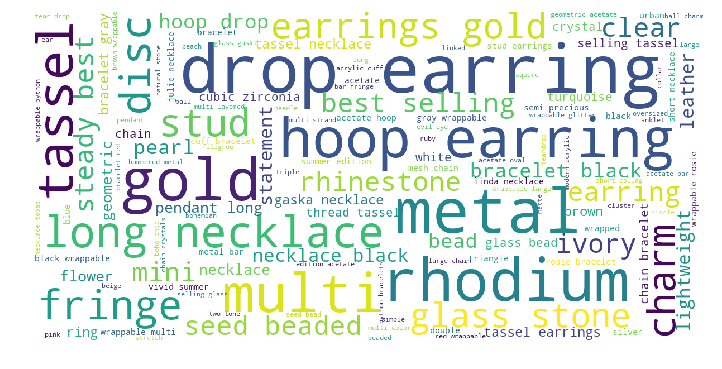

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.lineitem_name)

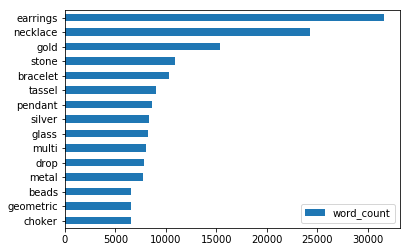

In [16]:
#Create a dictionary to see words with highest occurence in orders
item_string = " ".join(df.lineitem_name).split()
item_dict = {}

for i in item_string:
    if i in item_dict.keys():
        item_dict[i] += 1
    else:
        item_dict[i] = 1
        
item_dict

#turning dictionary into dataframe
item_wordcount = pd.DataFrame(pd.Series(item_dict)).rename(columns = {0:"word_count"})
item_wordcount = item_wordcount.sort_values("word_count", ascending=False)
item_wordcount = item_wordcount.drop("-", axis=0)

#plotting results
plot_wordcount = item_wordcount.head(15)
plot_wordcount.sort_values('word_count', ascending=1).plot(kind="barh")


### Item Frequency by Year; Plots

In [17]:
def item_freq(groupdf):
    item_dict = {}
    final_df = pd.DataFrame()
    
    for yr in groupdf.keys():
        
        for i in groupdf[yr]:
            if i in item_dict:
                item_dict[i] += 1
            else:
                item_dict[i] = 1
        
        #turn dictionary into dataframe
        tempdf = pd.DataFrame(pd.Series(item_dict)).rename(columns = {0:"word_count"})
        tempdf["year"] = yr
        final_df = pd.concat([final_df, tempdf], axis=0)
        
    return final_df
        

In [18]:
df_grouped = df.groupby("created_at_yr").apply(lambda x: " ".join(x.lineitem_name).split())
item_freq_df = item_freq(df_grouped).sort_values("word_count", ascending=False)
item_freq_df = item_freq_df.drop(["-","and"])
item_freq_df = item_freq_df.reset_index().rename(columns={"index":"word"})

#standardizing word_freq
item_freq_df["word_count_standardized"] = item_freq_df.groupby("year").transform(lambda x: (x-x.mean()) / x.std())
item_freq_df.head()

,word,word_count,year,word_count_standardized
0,earrings,31556,2018,32.017114
1,necklace,24215,2018,24.533082
2,earrings,19775,2017,26.636169
3,necklace,17798,2017,23.956280
4,gold,15382,2018,15.527980


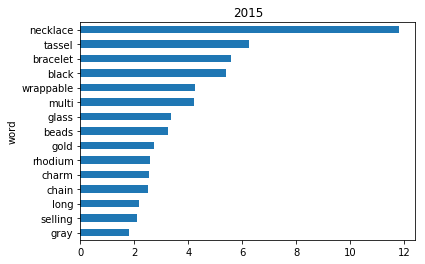

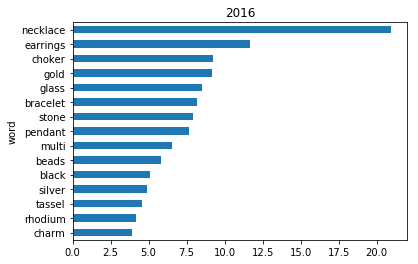

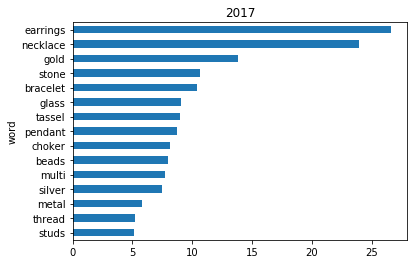

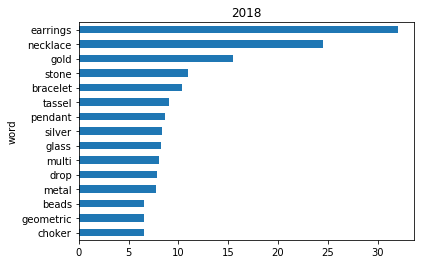

In [19]:
#top 15 most mentioned words in sales
top_15_freq = item_freq_df.groupby("year").head(15)
top_15_freq = top_15_freq.sort_values("word_count", ascending=1)

#unpacking groupby element and then plotting 
for year,df_ in top_15_freq.groupby("year"):
    df_.plot("word","word_count_standardized", kind="barh", title=year, legend=None, colormap="tab10")

### Check Sales per State

In [20]:
df.head()

,unnamed:_0,name,financial_status,paid_at,fulfillment_status,accepts_marketing,currency,subtotal,shipping,taxes,...,refunded_amount,vendor,risk_level,source,color,category,created_at_yr_mo,created_at_yr_mo_day,created_at_hour,created_at_yr
0,0,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,0.0,us jewelry house,low,web,gdtq,ring,2018-07,2018-07-16,12,2018
1,1,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,0.0,us jewelry house,low,web,gdtq,ring,2018-07,2018-07-16,12,2018
2,2,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,0.0,impression,low,web,size 8,ring,2018-07,2018-07-16,12,2018
3,3,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,0.0,ella,low,web,brown,necklace,2018-07,2018-07-16,12,2018
4,4,#4746,paid,2018-07-16 12:31:00,unfulfilled,yes,usd,100.5,13.64,0.0,...,0.0,stylist,low,web,white/brown,bracelet,2018-07,2018-07-16,12,2018


<BarContainer object of 15 artists>

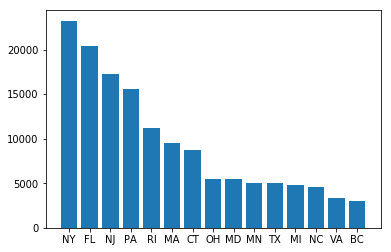

In [21]:
temp = df.groupby("shipping_province").agg({"lineitem_quantity":"sum"}).reset_index().sort_values("lineitem_quantity", ascending=0).head(15)

temp = temp.rename(columns={"shipping_province":"Shipping Province","lineitem_quantity": "Total Quantity Sold"})

temp["Shipping Province"] = temp["Shipping Province"].str.upper()

plt.bar(temp["Shipping Province"], temp["Total Quantity Sold"])

### Hour of the day with corresponding purchase volume

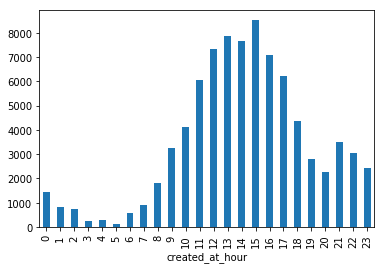

In [22]:
df.groupby("created_at_hour").agg({"lineitem_name":"count"}).sort_values("created_at_hour", ascending=1)\
.plot(kind="bar", legend=None)

In [68]:
df.columns

Index(['unnamed:_0', 'name', 'financial_status', 'paid_at',
       'fulfillment_status', 'accepts_marketing', 'currency', 'subtotal',
       'shipping', 'taxes', 'total', 'discount_code', 'discount_amount',
       'shipping_method', 'created_at', 'lineitem_quantity', 'lineitem_name',
       'lineitem_price', 'lineitem_compare_at_price', 'lineitem_sku',
       'lineitem_fulfillment_status', 'shipping_street', 'shipping_address1',
       'shipping_company', 'shipping_city', 'shipping_zip',
       'shipping_province', 'shipping_country', 'notes', 'cancelled',
       'payment_method', 'refunded_amount', 'vendor', 'risk_level', 'source',
       'color', 'category', 'created_at_yr_mo', 'created_at_yr_mo_day',
       'created_at_hour', 'created_at_yr'],
      dtype='object')

In [116]:
nov_df = df.loc[df["created_at_yr_mo"].dt.month==11, ["created_at_yr", "created_at_yr_mo_day", "created_at_hour", "lineitem_quantity"]]

In [120]:
nov_week1 = nov_df.loc[(nov_df["created_at_yr_mo_day"].dt.day>=1) & (nov_df["created_at_yr_mo_day"].dt.day<=7),:]
nov_week2 = nov_df.loc[(nov_df["created_at_yr_mo_day"].dt.day>7) & (nov_df["created_at_yr_mo_day"].dt.day<=14),:]
nov_week3 = nov_df.loc[(nov_df["created_at_yr_mo_day"].dt.day>14) & (nov_df["created_at_yr_mo_day"].dt.day<=21),:]
nov_week4 = nov_df.loc[(nov_df["created_at_yr_mo_day"].dt.day>21) & (nov_df["created_at_yr_mo_day"].dt.day<=28),:]

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


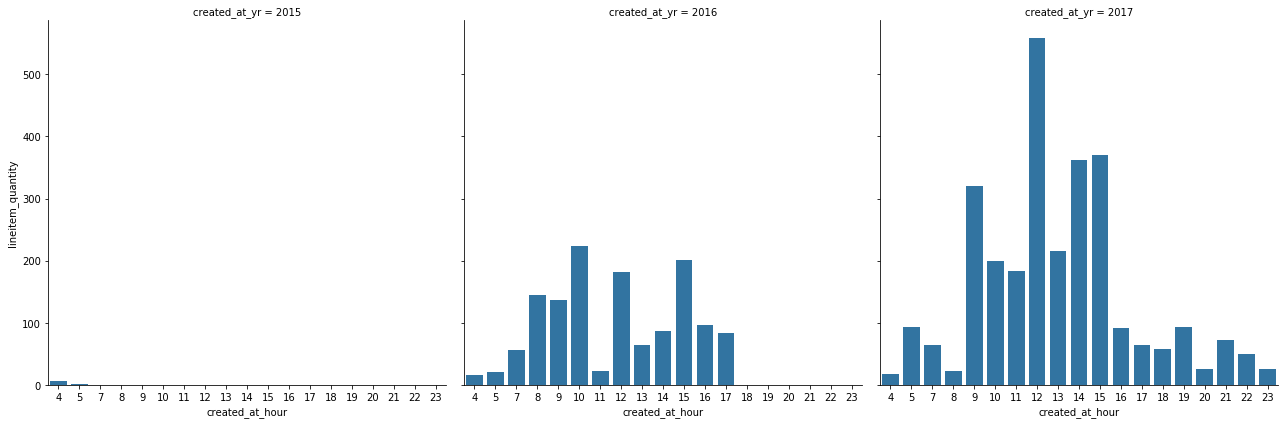

In [138]:
#Nov Week1 purchases by hour
nov_week1_temp = nov_week1.groupby(["created_at_yr","created_at_hour"]).agg({"lineitem_quantity":"sum"}).reset_index()

g = sns.FacetGrid(nov_week1_temp, col="created_at_yr", palette="Set3", size=6)
g.map(sns.barplot,'created_at_hour','lineitem_quantity')
    

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


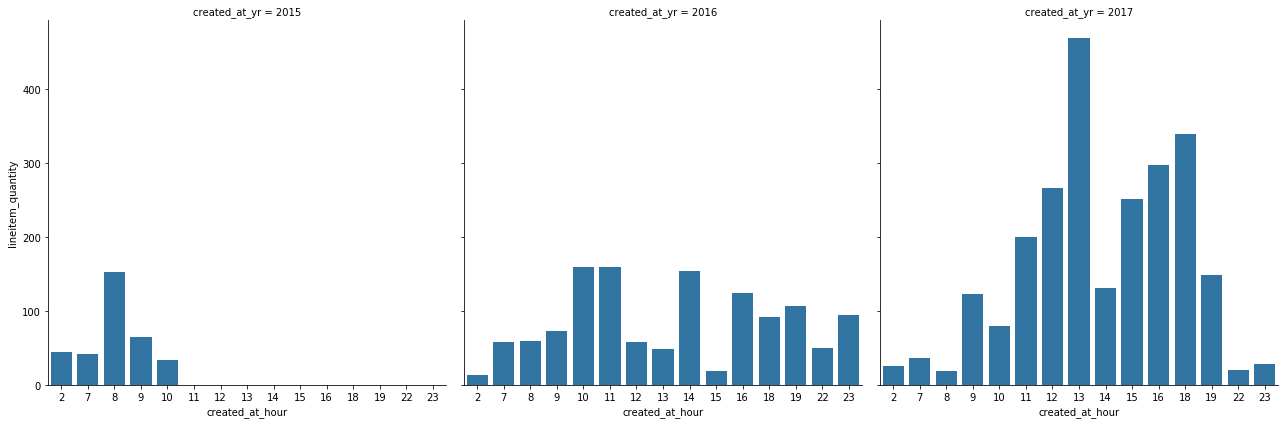

In [140]:
#Nov Week2 purchases by hour
nov_week2_temp = nov_week2.groupby(["created_at_yr","created_at_hour"]).agg({"lineitem_quantity":"sum"}).reset_index()

g = sns.FacetGrid(nov_week2_temp, col="created_at_yr", palette="Set3", size=6)
g.map(sns.barplot,'created_at_hour','lineitem_quantity')

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


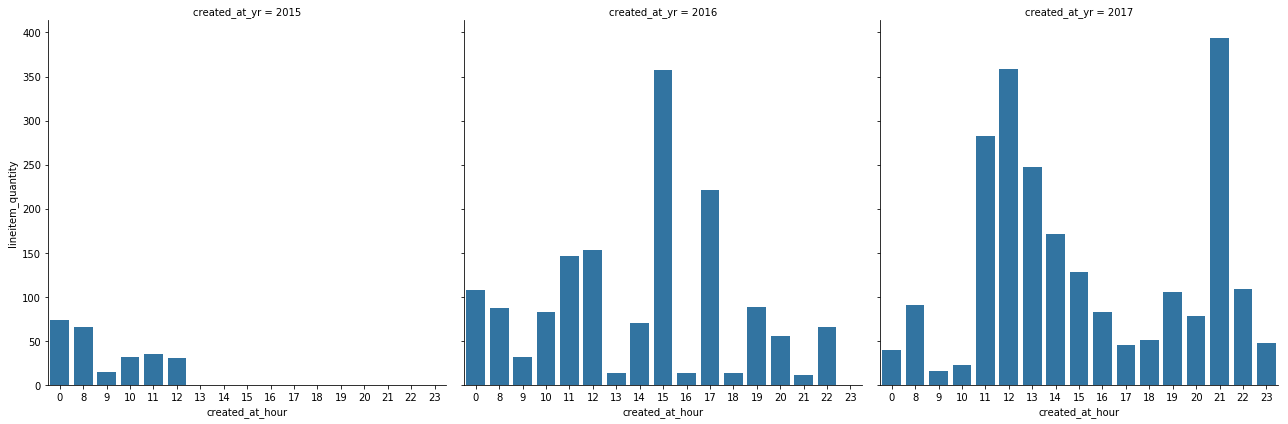

In [141]:
#Nov Week3 purchases by hour
nov_week3_temp = nov_week3.groupby(["created_at_yr","created_at_hour"]).agg({"lineitem_quantity":"sum"}).reset_index()

g = sns.FacetGrid(nov_week3_temp, col="created_at_yr", palette="Set3", size=6)
g.map(sns.barplot,'created_at_hour','lineitem_quantity')

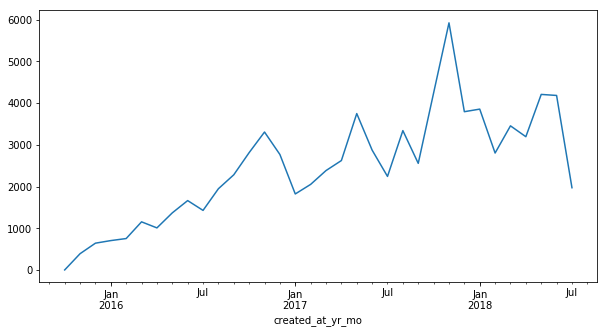

In [131]:
import matplotlib.dates as mdates

df.groupby("created_at_yr_mo").agg({"lineitem_name":"count"}).sort_values("created_at_yr_mo", ascending=1)\
.plot(kind="line", legend=None, figsize=(10,5))

### Model (Time Series)

In [24]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

### Formatting data to show monthly sales

In [25]:
#creating df with total monthly sales data
mo_sale_df = df.groupby("created_at").agg({"total":"mean"}).reset_index()
mo_sale_df = created_at_cols(mo_sale_df)
mo_sale_df = mo_sale_df.groupby("created_at_yr_mo").agg({"total":"sum"})

In [26]:
#Set index to DatetimeIndex
mo_sale_df.index= mo_sale_df.index.to_timestamp()

### Plotting monthly sales

In [67]:
mo_sale_df.groupby()

,total
created_at_yr_mo,
2015-10-01,44.80
2015-11-01,6307.83
2015-12-01,11900.35
2016-01-01,9851.07
2016-02-01,12570.36


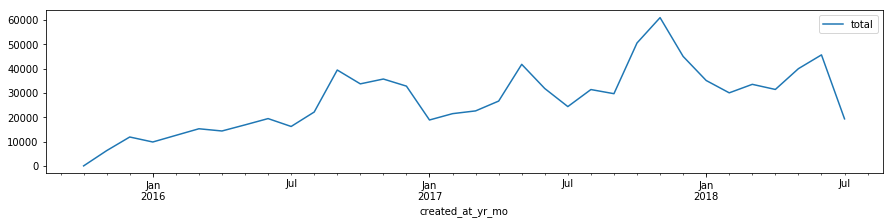

In [241]:
mo_sale_df.plot(figsize=(15,3))

### Checking trends and seasonality

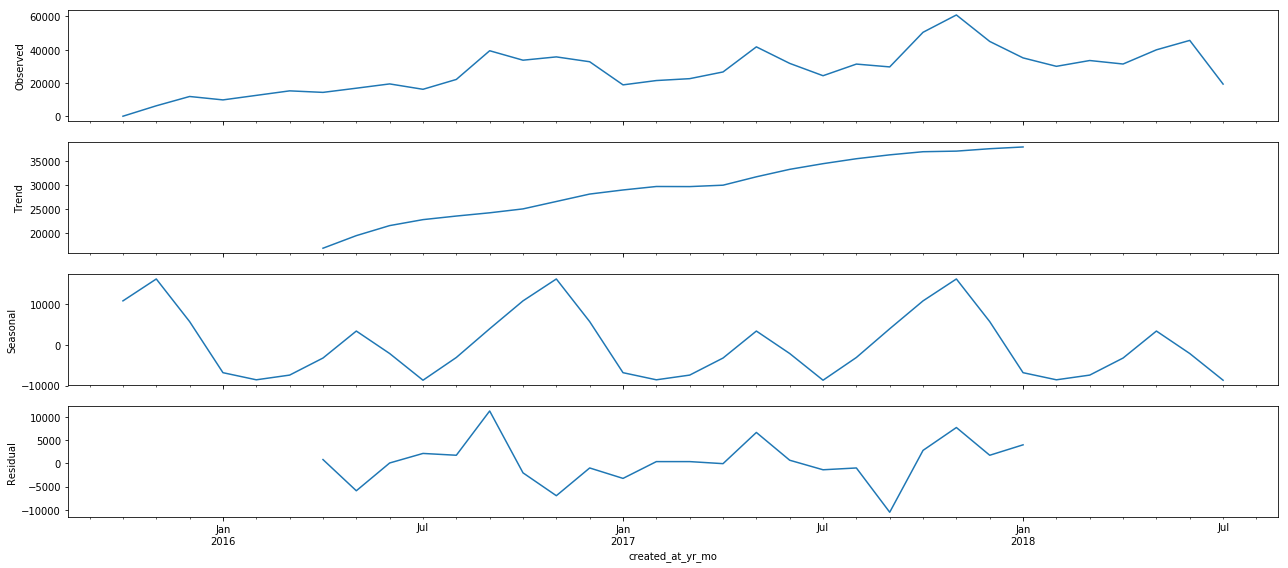

In [242]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(mo_sale_df, model='additive')
fig = decomposition.plot()
plt.show()

In [249]:
#Parameters for ARIMA model (p,d,q) = seasonality, trend, noise
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [261]:
#grid search for best model parameter (loweset AIC)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(mo_sale_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:777.6463844196866
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:464.2033558437008
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:484.72698515466067
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:212.35058257552996
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:731.7129298009704
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:430.5796632296264
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:502.1318902302107
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:217.26798934774067
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:678.3978846159521
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:432.7316126624163
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:451.73127555951635
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:195.60551136540366
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:659.9058310983662
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:404.3015549925962
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:448.0524354405072
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:195.25012521181847
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:700.350213324227
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:449.5646984297538
ARIMA

In [262]:
#checking results using best model
mod = sm.tsa.statespace.SARIMAX(mo_sale_df,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9016      0.808     -1.115      0.265      -2.486       0.683
ar.S.L12       0.0935      0.469      0.199      0.842      -0.827       1.014
sigma2      1.179e+08   9.16e-10   1.29e+17      0.000    1.18e+08    1.18e+08


ValueError: operands could not be broadcast together with shapes (9,) (6,) (9,) 

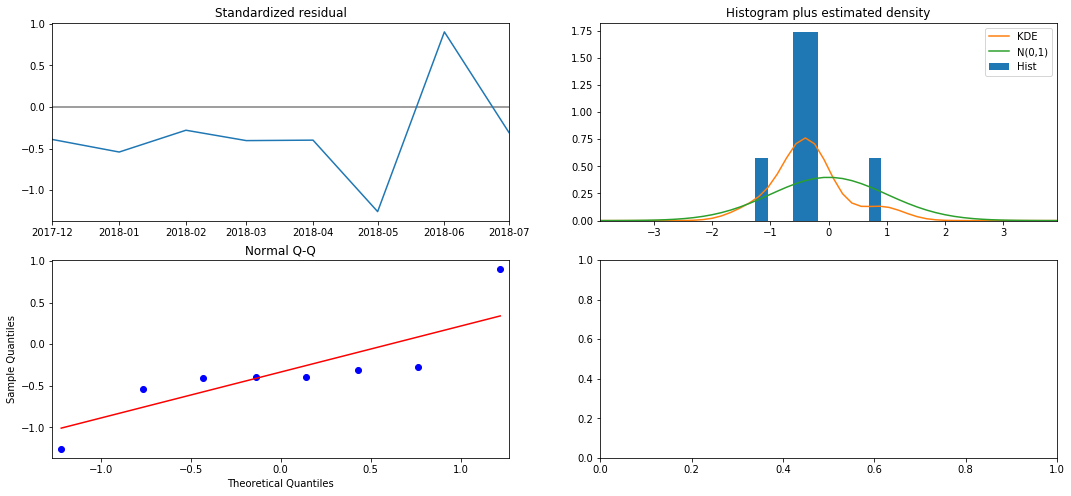

In [265]:
results.plot_diagnostics()
plt.show()

### Formatting data to show daily sales
<b>(Missing days were imputed using sales from last known date)</b>

In [32]:
time_sale_df = df.groupby("created_at").agg({"total":"mean"}).reset_index()
time_sale_df = created_at_cols(time_sale_df)
time_sale_df = time_sale_df.groupby("created_at_yr_mo_day").agg({"total":"sum"})

In [33]:
#create table with all days from inception to last day of dataset
idx = pd.period_range(min(time_sale_df.index), max(time_sale_df.index))
time_sale_df = time_sale_df.reindex(idx)

#create new df with imputed values
# imp_timedf = time_sale_df.fillna(method="ffill").reset_index()
# imp_timedf = imp_timedf.rename(columns={"index":"date"})

imp_timedf = time_sale_df.fillna(method="ffill")

#Set index to DatetimeIndex
imp_timedf.index = imp_timedf.index.to_timestamp()

### Plotting Daily Sales

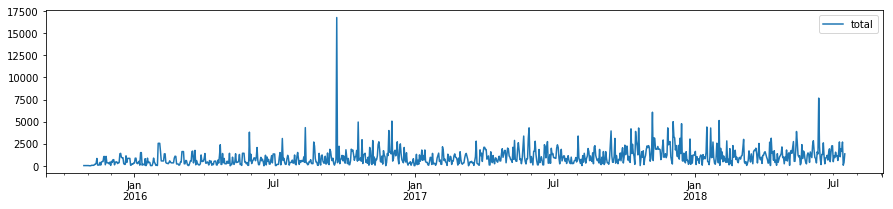

In [34]:
imp_timedf.plot(figsize=(15,3))

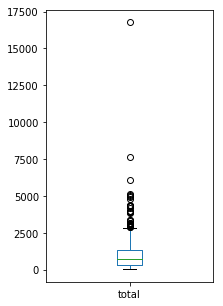

In [35]:
#plotting outliers 
imp_timedf.plot(kind="box", figsize=(3,5))

In [36]:
#outliers above 3000
imp_timedf.loc[imp_timedf["total"]>3000]

#imputing outlier with prior day
#imp_timedf.loc[imp_timedf.index=="09-21-2016"] = imp_timedf.loc[imp_timedf.index=="09-20-2016"]

,total
2016-05-30,3819.000000
2016-07-12,3105.330000
2016-08-11,4333.640000
2016-09-21,16766.340000
2016-10-19,4964.620000
2016-11-28,4004.960000
2016-12-02,5068.440000
2017-05-23,3378.810000
2017-05-29,3126.080000
2017-05-30,4305.690000


In [37]:
#replacing outliers with prior day's data
outlier_dates = imp_timedf.loc[imp_timedf["total"]>6000].index
day_sale_df = imp_timedf["total"].mask(imp_timedf.index.isin(outlier_dates)).ffill().to_frame()

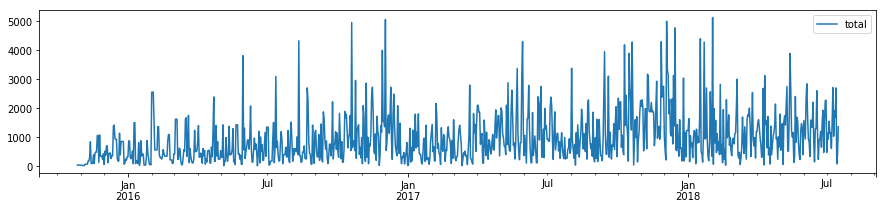

In [38]:
#Plotting again without outlier
day_sale_df.plot(figsize=(15,3))

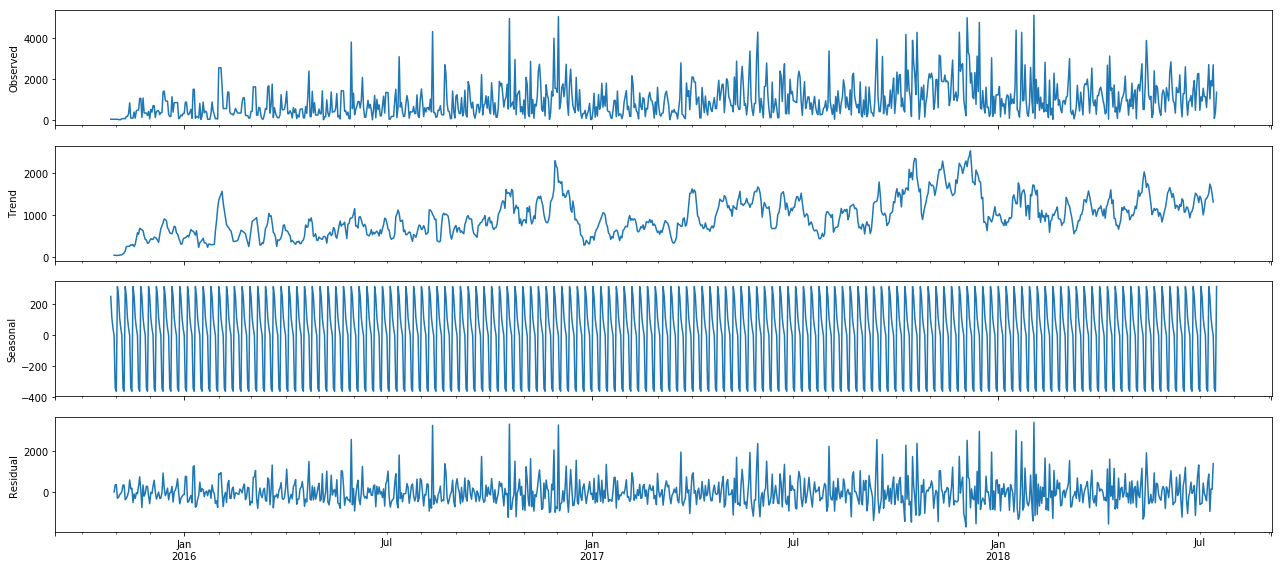

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(day_sale_df, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
#Parameters for ARIMA model (p,d,q) = seasonality, trend, noise
p = d = q = range(0, 7)
pdq = list(itertools.product(p, d, q))

In [41]:
#grid search for best model parameter (loweset AIC)

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(day_sale_df,
                                        order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))

    except:
        continue

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0) - AIC:17048.942878294994
ARIMA(0, 0, 1) - AIC:16720.3272157958
ARIMA(0, 0, 2) - AIC:16576.88271931331
ARIMA(0, 0, 3) - AIC:16519.004914828456
ARIMA(0, 0, 4) - AIC:16450.621107775485
ARIMA(0, 0, 5) - AIC:16437.37122805906
ARIMA(0, 0, 6) - AIC:16432.760274178116
ARIMA(0, 1, 0) - AIC:16606.11496793437
ARIMA(0, 1, 1) - AIC:16080.52858554622
ARIMA(0, 1, 2) - AIC:16070.440624343195
ARIMA(0, 1, 4) - AIC:16068.74134524577
ARIMA(0, 1, 6) - AIC:16071.175509073531
ARIMA(0, 2, 0) - AIC:17629.62907241233
ARIMA(0, 2, 2) - AIC:16078.210902223176
ARIMA(0, 3, 0) - AIC:18786.347985961787
ARIMA(0, 3, 2) - AIC:16601.083212401234
ARIMA(0, 4, 0) - AIC:20000.953144282736
ARIMA(0, 5, 0) - AIC:21245.539305538736
ARIMA(0, 6, 0) - AIC:22507.860842056885
ARIMA(1, 0, 0) - AIC:16448.420369011525
ARIMA(1, 0, 1) - AIC:16098.932546972128
ARIMA(1, 0, 4) - AIC:16089.32008097496


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 6) - AIC:16087.9382717513
ARIMA(1, 1, 0) - AIC:16409.309148286473
ARIMA(1, 1, 1) - AIC:16070.848961928956


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 4) - AIC:16070.385419199445
ARIMA(1, 1, 6) - AIC:16073.152019976018
ARIMA(1, 2, 0) - AIC:17121.66819420024
ARIMA(1, 2, 1) - AIC:16402.4559973786
ARIMA(1, 3, 0) - AIC:18012.24977946056
ARIMA(1, 4, 0) - AIC:19006.857790335653
ARIMA(1, 5, 0) - AIC:20067.26228276006
ARIMA(1, 6, 0) - AIC:21172.378358705435
ARIMA(1, 6, 2) - AIC:18994.92616152829
ARIMA(2, 0, 0) - AIC:16346.98787736348
ARIMA(2, 0, 1) - AIC:16089.298449392474
ARIMA(2, 0, 2) - AIC:16090.917693137697
ARIMA(2, 0, 4) - AIC:16089.776613076763


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 6) - AIC:16090.284163347556
ARIMA(2, 1, 0) - AIC:16333.072038345632
ARIMA(2, 1, 1) - AIC:16071.911871475988


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:16035.811980785722


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4) - AIC:16069.518829443456


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 5) - AIC:16043.280244455513
ARIMA(2, 1, 6) - AIC:16061.205969377008
ARIMA(2, 2, 0) - AIC:16908.327206033522
ARIMA(2, 2, 1) - AIC:16326.639085447001
ARIMA(2, 3, 0) - AIC:17657.908744777298
ARIMA(2, 3, 1) - AIC:16900.79184328937
ARIMA(2, 4, 0) - AIC:18523.619841399268
ARIMA(2, 4, 1) - AIC:17649.135305012293
ARIMA(2, 5, 0) - AIC:19463.60193637112
ARIMA(2, 5, 1) - AIC:18513.475510467684
ARIMA(2, 6, 0) - AIC:20453.776503513378
ARIMA(2, 6, 1) - AIC:19452.182495111927
ARIMA(3, 0, 0) - AIC:16302.455474494272


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1) - AIC:16092.32514795636
ARIMA(3, 1, 0) - AIC:16266.513496385676
ARIMA(3, 1, 1) - AIC:16068.75419840479
ARIMA(3, 1, 3) - AIC:16072.29708566571


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4) - AIC:16072.267257072883


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 6) - AIC:16063.17312949398
ARIMA(3, 2, 0) - AIC:16739.47004926043
ARIMA(3, 2, 1) - AIC:16260.590055678338
ARIMA(3, 3, 0) - AIC:17368.340189295493
ARIMA(3, 3, 1) - AIC:16732.577232693708
ARIMA(3, 4, 0) - AIC:18134.447001466553
ARIMA(3, 4, 1) - AIC:17360.429977495274
ARIMA(3, 5, 0) - AIC:18996.535203965836
ARIMA(3, 5, 1) - AIC:18125.14447266067
ARIMA(3, 6, 0) - AIC:19918.56819698366
ARIMA(4, 0, 0) - AIC:16254.967248510087


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1) - AIC:16087.126102713759
ARIMA(4, 0, 6) - AIC:16071.243253232022
ARIMA(4, 1, 0) - AIC:16239.357462446618
ARIMA(4, 1, 1) - AIC:16070.215142754874


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 5) - AIC:16033.076370850586


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 6) - AIC:16028.499442951492
ARIMA(4, 2, 0) - AIC:16664.281518204596
ARIMA(4, 2, 1) - AIC:16233.768876405422
ARIMA(4, 3, 0) - AIC:17192.76785940161
ARIMA(4, 3, 2) - AIC:16238.422492771922
ARIMA(4, 4, 0) - AIC:17837.22868924165
ARIMA(4, 5, 0) - AIC:18602.985098143887
ARIMA(4, 6, 0) - AIC:19461.13178428245
ARIMA(5, 0, 0) - AIC:16236.051042577583


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 0, 1) - AIC:16088.560706374648
ARIMA(5, 1, 0) - AIC:16190.581883279981
ARIMA(5, 1, 1) - AIC:16066.298231725217


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3) - AIC:16059.008840310807


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 5) - AIC:16015.821080796577


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 6) - AIC:16008.752393863288
ARIMA(5, 2, 0) - AIC:16611.34060265845
ARIMA(5, 2, 1) - AIC:16185.421990795068
ARIMA(5, 3, 0) - AIC:17107.65892301106
ARIMA(5, 4, 0) - AIC:17664.464111104404
ARIMA(5, 5, 0) - AIC:18308.134773625607
ARIMA(5, 6, 0) - AIC:19055.878653697626
ARIMA(6, 0, 0) - AIC:16195.122297236547


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 1) - AIC:16084.503742123343


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 0, 2) - AIC:16086.717342065425
ARIMA(6, 1, 0) - AIC:16124.037862390522
ARIMA(6, 1, 1) - AIC:16068.206841207986


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2) - AIC:16070.300010809966


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3) - AIC:16046.415835782514


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4) - AIC:16067.58024028314


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 5) - AIC:16038.658129782047


C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 6) - AIC:16007.987733096988
ARIMA(6, 2, 0) - AIC:16520.739581929887
ARIMA(6, 3, 0) - AIC:17033.552011566506
ARIMA(6, 4, 0) - AIC:17578.213283546407
ARIMA(6, 5, 0) - AIC:18162.7142741035
ARIMA(6, 6, 0) - AIC:18808.70327569551


In [31]:
#checking results using best model
mod = sm.tsa.statespace.SARIMAX(mo_sale_df,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9016      0.808     -1.115      0.265      -2.486       0.683
ar.S.L12       0.0935      0.469      0.199      0.842      -0.827       1.014
sigma2      1.179e+08   9.16e-10   1.29e+17      0.000    1.18e+08    1.18e+08


### Weekly Sales TS

In [50]:
useGrouper = True
if useGrouper:
        grouper    = pd.Grouper(freq='W-FRI')
        week_sale = day_sale_df.groupby(grouper).sum()
        week_sale.head()

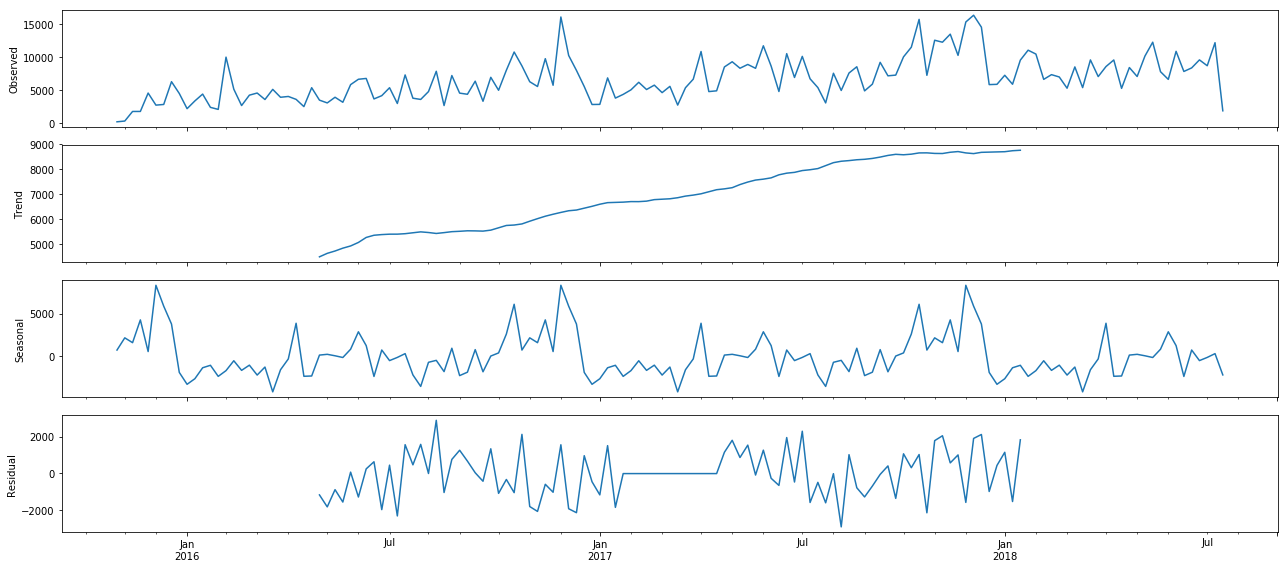

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(week_sale, model='additive')
fig = decomposition.plot()
plt.show()

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys


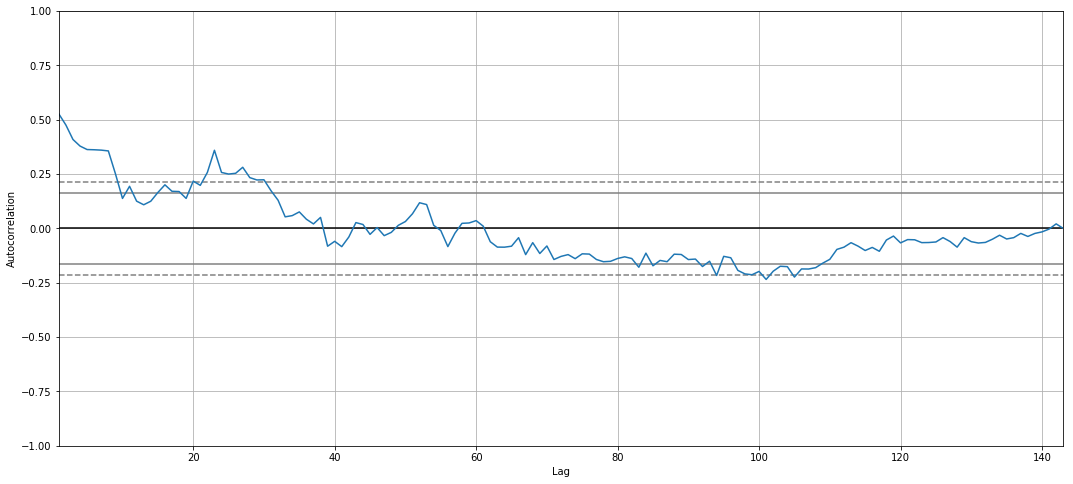

In [64]:
#Autocorrelation plot
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(week_sale)
pyplot.show()

C:\Users\rayl1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


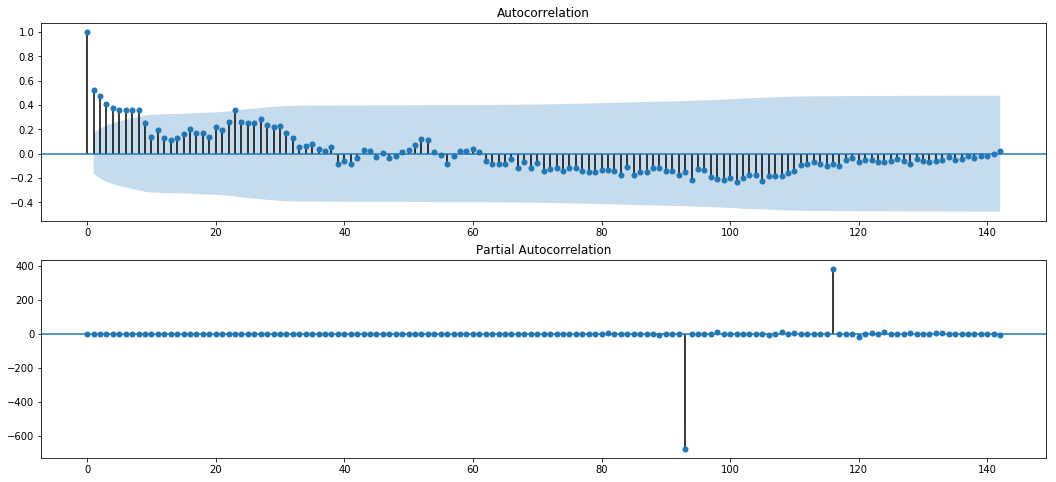

In [144]:
#Another autocorrelation plot
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = week_sale["total"]
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [66]:
#test for stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(week_sale["total"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.530817
p-value: 0.000173
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578


In [159]:
from statsmodels.tsa.arima_model import ARIMA

p = range(1, 8)
d = range(0, 2)
q = range(1, 8)
pdq = list(itertools.product(p, d, q))

score=[]
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(week_sale,
                                        order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        score.append(results.aic)

    except:
        continue
 

ARIMA(1, 0, 1) - AIC:2663.5568965285092
ARIMA(1, 0, 2) - AIC:2664.848871214749
ARIMA(1, 0, 4) - AIC:2667.7536627936406
ARIMA(1, 0, 5) - AIC:2669.7062303031266
ARIMA(1, 0, 6) - AIC:2672.1213460341405
ARIMA(1, 0, 7) - AIC:2673.5203641771727
ARIMA(1, 1, 1) - AIC:2643.0477612550444
ARIMA(1, 1, 2) - AIC:2644.9571106322987
ARIMA(1, 1, 3) - AIC:2644.659276968059
ARIMA(1, 1, 4) - AIC:2646.442473619886
ARIMA(1, 1, 5) - AIC:2649.7057843172806
ARIMA(1, 1, 6) - AIC:2651.970716710809
ARIMA(1, 1, 7) - AIC:2653.8845876969217
ARIMA(2, 0, 1) - AIC:2665.2191169181456
ARIMA(2, 0, 5) - AIC:2671.7015398342364
ARIMA(2, 0, 6) - AIC:2673.792184325329
ARIMA(2, 0, 7) - AIC:2675.46566107195
ARIMA(2, 1, 1) - AIC:2643.6979275412104
ARIMA(2, 1, 2) - AIC:2646.495407342009
ARIMA(2, 1, 4) - AIC:2644.7229872808907
ARIMA(2, 1, 5) - AIC:2647.2095850797195
ARIMA(2, 1, 6) - AIC:2649.245967565605
ARIMA(2, 1, 7) - AIC:2651.4426622420706
ARIMA(3, 0, 1) - AIC:2666.1674060331816
ARIMA(3, 0, 5) - AIC:2670.140969151884
ARIMA(3, 0

In [162]:
min(score)

2643.0477612550444

In [169]:
mod = sm.tsa.statespace.SARIMAX(week_sale, order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0888      0.103      0.860      0.390      -0.114       0.291
ma.L1         -0.7652      0.069    -11.151      0.000      -0.900      -0.631
sigma2      7.226e+06   7.24e+05      9.984      0.000    5.81e+06    8.64e+06


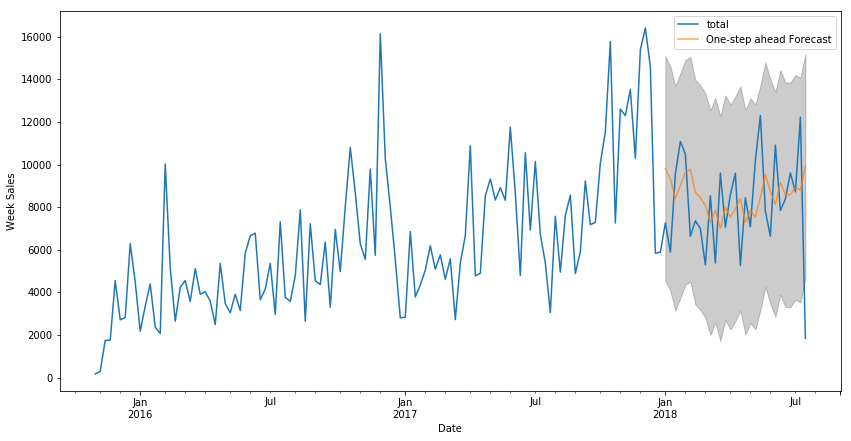

In [176]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = week_sale.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Week Sales')
plt.legend()
plt.show()